In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import for date formatting
from glob import glob
import calendar
import datetime

In [7]:
load_raw = True

In [8]:
dataset_folder = "dataset/"
csv_file =  dataset_folder + "dataset.csv"

dataframe = None

if load_raw:
    # read all xlxs files in the dataset folder using pandas
    xls_files = glob(dataset_folder + "*.xls")

    # merge all the files into one dataframe
    dataframe = pd.concat([pd.read_excel(file, header=3) for file in xls_files])

    # keep only the columns namely DateTime and Corrected Upscaled Measurement [MW]
    dataframe = dataframe[["DateTime", "Real-time Upscaled Measurement [MW]", "Monitored Capacity [MWp]"]]
    # rename the column to make it easier to access
    dataframe.columns = ["DateTime", "MW", "Capacity"]

    # convert the DateTime column to datetime object
    dataframe["DateTime"] = pd.to_datetime(dataframe["DateTime"], format="mixed")
    
    # if the capacity is 0 then set it by read the value from the previous row
    dataframe["Capacity"] = dataframe["Capacity"].replace(0, None).fillna(method="ffill")
    
    # save the dataframe to a csv file
    
    dataframe.to_csv(csv_file, index=False)
else:
    dataframe = pd.read_csv(csv_file)

C:\Users\buntu\AppData\Local\Temp\ipykernel_14008\3140450285.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe["Capacity"] = dataframe["Capacity"].replace(0, None).fillna(method="ffill")
C:\Users\buntu\AppData\Local\Temp\ipykernel_14008\3140450285.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe["Capacity"] = dataframe["Capacity"].replace(0, None).fillna(method="ffill")


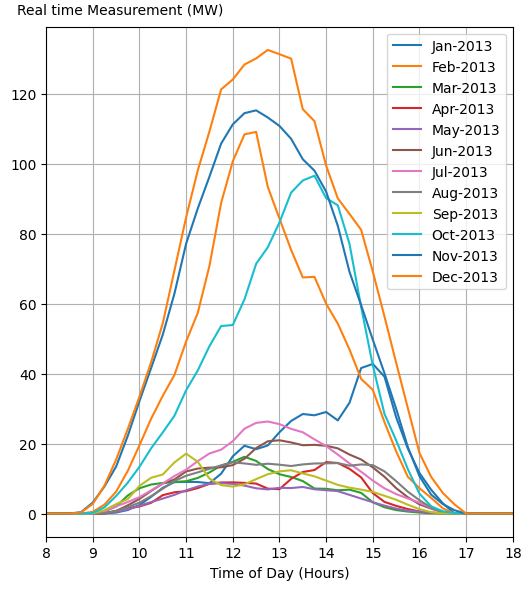

In [34]:
df = dataframe.copy()
df["DateTime"] = pd.to_datetime(df["DateTime"])

# Filter for the first day of each month in 2013
df["Date"] = df["DateTime"].dt.date
df["Time"] = df["DateTime"].dt.hour + df["DateTime"].dt.minute / 60  # Convert time to hours

first_day_each_month = df[df["DateTime"].dt.is_month_start & (df["DateTime"].dt.year == 2013)]

# Plot data
plt.figure(figsize=(5.5, 6))

for month in range(1, 13):
    monthly_data = first_day_each_month[first_day_each_month["DateTime"].dt.month == month]
    month_name = calendar.month_abbr[month]  # Convert month number to short name (e.g., "Jan")
    plt.plot(monthly_data["Time"], monthly_data["MW"], label=f"{month_name}-2013")

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Real time Measurement (MW)", rotation=0, loc="top")
plt.gca().yaxis.set_label_coords(0.38, 1.02)
# plt.title("MW Capacity on the First Day of Each Month in 2013")

# Set x-axis ticks every hour
plt.xticks(range(0, 25, 1))  # From 0 to 24 in steps of 1 hour
plt.xlim(8, 18)

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()